<a href="https://colab.research.google.com/github/Itsme-subbu/Ybi/blob/main/movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System

# Objective
The objective of a movie recommendation system is to provide personalized movie suggestions to users based on their preferences, behaviors, and historical data. The system aims to enhance user experience by helping users discover movies they are likely to enjoy, thereby increasing user satisfaction, engagement, and retention.

# Data Source

 For a movie recommendation system, you'll need a robust data source that
 provides comprehensive information about movies
so we can use the dataset called "Internet Movie Database (IMDb)"
which provides user ratings,reviews and a wealth of trivia.

#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
df=pd.read_csv("imdb_movies.csv")
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


# Describe Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [4]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [5]:
df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [6]:
df.shape


(10178, 12)

In [7]:
df.drop_duplicates(subset="orig_title",inplace=True)

#Data Visualization

In [8]:
df["date_x"]=df["date_x"].str. strip()
df["date_x"] = pd.to_datetime(df["date_x"], format="%m/%d/%Y", errors='coerce')
df["date_x"].fillna(pd.to_datetime(df["date_x"], format="%m-%d-%Y", errors='coerce'), inplace=True)

df["Release_year"]=df["date_x"].dt.year
df["Release_month"]=df["date_x"].dt.month

In [9]:
max_revenue = df.sort_values('revenue', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canva

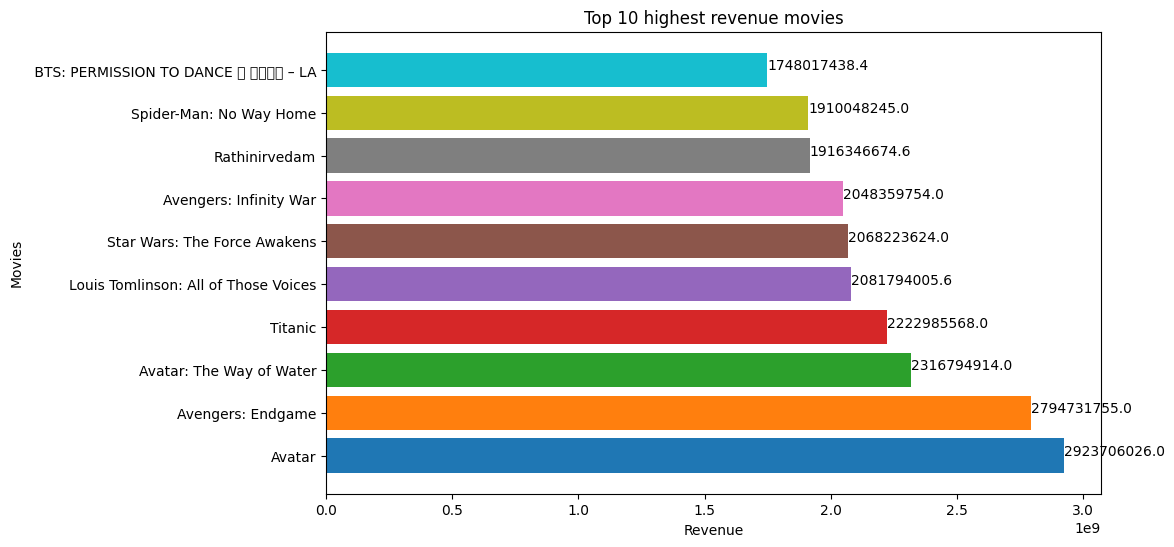

In [10]:
fig, axs = plt.subplots(1,1,figsize=(10,6))
col_map = plt.get_cmap('tab10')
axs.barh(max_revenue['orig_title'], max_revenue['revenue'], color=col_map.colors)
axs.set_title('Top 10 highest revenue movies')
axs.set_xlabel('Revenue')
axs.set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs.text(max_revenue['revenue'].iloc[i], max_revenue['orig_title'].iloc[i], max_revenue['revenue'].iloc[i])

# Data Preprocessing

In [11]:
df.isnull().sum()


names             0
date_x            0
score             0
genre            81
overview          0
crew             53
orig_title        0
status            0
orig_lang         0
budget_x          0
revenue           0
country           0
Release_year      0
Release_month     0
dtype: int64

In [12]:
df.dropna(inplace=True)
df=df.dropna()
recommended=df.copy()

In [13]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
recommended["index"]=range(0,len(recommended))
recommended=recommended.set_index("index").reset_index()
selected_features=["genre","crew","orig_lang"]
print(selected_features)
for feature in selected_features:
  recommended[feature]=recommended[feature].fillna("")
combined_features=recommended["genre"]+" "+recommended["overview"]+" "+recommended["crew"]

['genre', 'crew', 'orig_lang']


In [14]:
vectorizer=TfidfVectorizer()
feature_vectors=vectorizer.fit_transform(combined_features)
similarity=cosine_similarity(feature_vectors)

# Define Target Variable (y) and Feature Variables (X)

In [15]:
numerical=["budget_x","score","Release_year"]
x = df[["budget_x","score","Release_year"]]
y = df["revenue"]

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape,x_test.shape)

(7691, 3) (1923, 3)


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
column_transformer = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), numerical)],remainder='passthrough')
featured_xtrain = column_transformer.fit_transform(x_train)
featured_xtest = column_transformer.transform(x_test)

# Model Evaluation

In [18]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
model = RandomForestRegressor(n_estimators=200,ccp_alpha=0.1,criterion="poisson",min_samples_split=60)
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 1.5,max_depth = 300, alpha = 2, n_estimators = 10)

In [19]:
model.fit(featured_xtrain,y_train)
model_xgb.fit(featured_xtrain,y_train)

XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=300, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

# Prediction

In [20]:
score = model.predict(featured_xtrain)
score_xgb = model_xgb.predict(featured_xtrain)
score_in_test =  model.predict(featured_xtest)
xgb_score_in_test= model_xgb.predict(featured_xtest)

In [21]:
from sklearn import metrics
model_score= metrics.mean_squared_error(y_train,score)
r2_score= metrics.r2_score(y_train,score)
model_score_test= metrics.mean_squared_error(y_test,score_in_test)
r2_score_test = metrics.r2_score(y_test,score_in_test)

print("Mean squared error in Random forest: \n","\ntrain data :",model_score,"\ntest data: ",model_score_test)
print("\n\nR2 score in Random forest: \n","\ntrain data :",r2_score,"\ntest data: ",r2_score_test)
print("\n\n")

Mean squared error in Random forest: 
 
train data : 2.0594794142803028e+16 
test data:  2.4256827698447852e+16


R2 score in Random forest: 
 
train data : 0.7349011006184981 
test data:  0.658239914754126





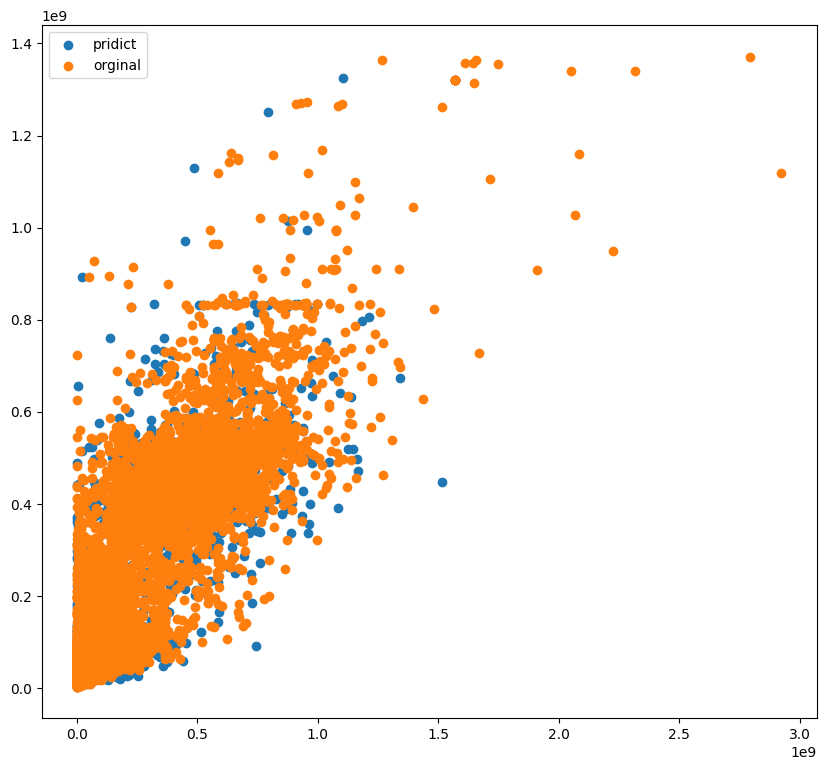

In [22]:
plt.figure(figsize=(10,9))
plt.scatter(y_test,score_in_test)
plt.scatter(y_train,score)
plt.legend(["pridict","orginal"])

plt.show()

In [23]:
moviename="Iron man"
print("enter your favourite movie name : ",moviename)
list_of_titles=recommended["names"].tolist()
close_match=difflib.get_close_matches(moviename,list_of_titles)
print("similar names :",close_match,"\n\n")


enter your favourite movie name :  Iron man
similar names : ['Iron Man', 'Iron Man 3', 'Iron Man 2'] 




In [24]:
close=close_match[0]
movie_index=recommended[recommended.names==close]["index"].values[0]
print(movie_index)


612


In [25]:
similarity_score=list(enumerate(similarity[movie_index]))
similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)
print("Movies suggested for you : \n")
i=1
for movie in similar_movies:
  index=movie[0]
  title_index=recommended[recommended.index==index]["names"].values[0]
  if(i<=5):
    print(i, ".",title_index)
    i+=1

Movies suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Spider-Man: Homecoming
5 . The Invincible Iron Man


# Explaination

A movie recommendation system is a tool designed to suggest movies to users based on various factors. It leverages data about movies and users to predict what films a user might enjoy.